http://kateto.net/networks-r-igraph

# Basics

In [1]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”also installing the dependencies ‘NMF’, ‘irlba’

Warning message in install.packages("igraph"):
“installation of package ‘NMF’ had non-zero exit status”Warning message in install.packages("igraph"):
“installation of package ‘irlba’ had non-zero exit status”Warning message in install.packages("igraph"):
“installation of package ‘igraph’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library("igraph"): there is no package called ‘igraph’


In [106]:
p <- 0.1 

# create random graph
g <- random.graph.game(100, p, directed=F);

is.connected(g)

[1] TRUE

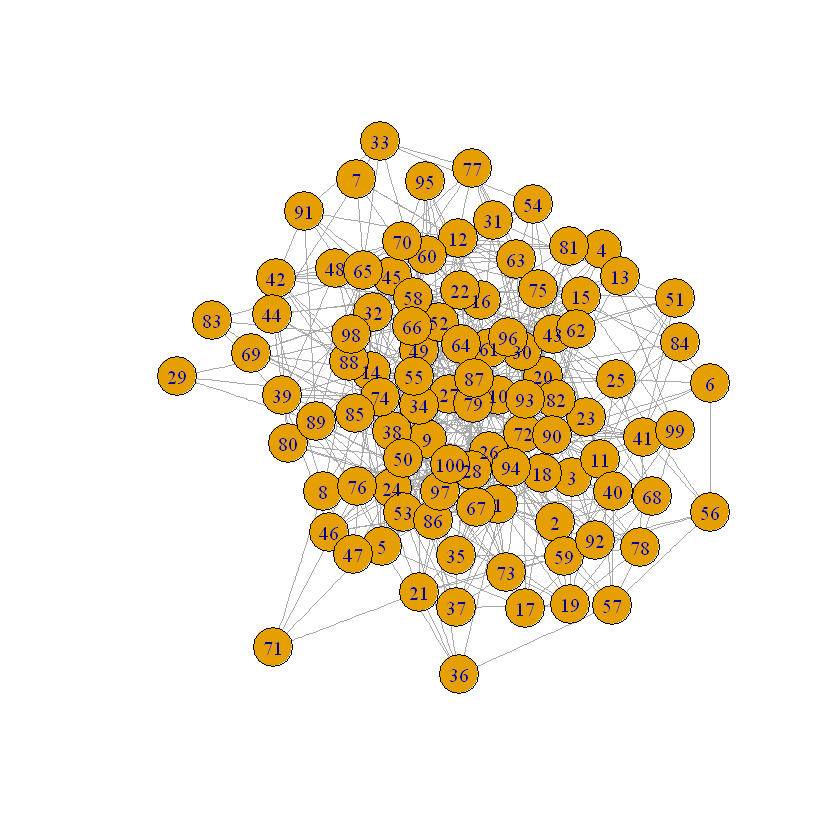

In [17]:
plot(g)

# Giant Connected Component

In [58]:
g <- erdos.renyi.game(1000, p, directed=F);
is.connected(g)

[1] TRUE

In [107]:
g <- erdos.renyi.game(1000, 0.002, directed=F);
is.connected(g)

[1] FALSE

In [108]:
cl <- clusters(g)

# find the giant connected component
gccIndex = which.max(cl$csize)
nonGccNodes <- (1:vcount(g))[cl$membership != gccIndex]
gcc <- delete.vertices(g, nonGccNodes)

In [111]:
V(gcc)
E(gcc)

+ 835/835 vertices:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
+ ... omitted several vertices

+ 1031/1031 edges:
 [1]  15-- 31   6-- 47  18-- 53  35-- 53  33-- 56  18-- 59  27-- 62  59-- 62
 [9]  16-- 63   8-- 68  76-- 77  64-- 94  50-- 99  58--101  74--103  57--108
[17]  86--111  45--113  78--114  54--117   1--119  76--124 115--124   1--126
[25] 123--128  86--129  81--134 127--137 119--139  19--141  65--142   4--148
[33]  42--152  40--154  14--156  80--156  56--160  65--161   1--162 152--163
[41]  30--167  85--168 163--169  16--170 125--170 109--172  26--173  96--173
[49] 122--174  35--176 168--176  78--183  15--185 131--185 101--188  94--193
[57] 182--194  61--198  81--199 112--199  16--202  26--202 152--203 129--205
[65] 185--205  80--208 206--210 118--211  87--213 201--214 143--215  88--217
[73]  82--221 202--221  64--223  14--224 173--224  58--227 183--228  12--229
+ ... omitted several edges

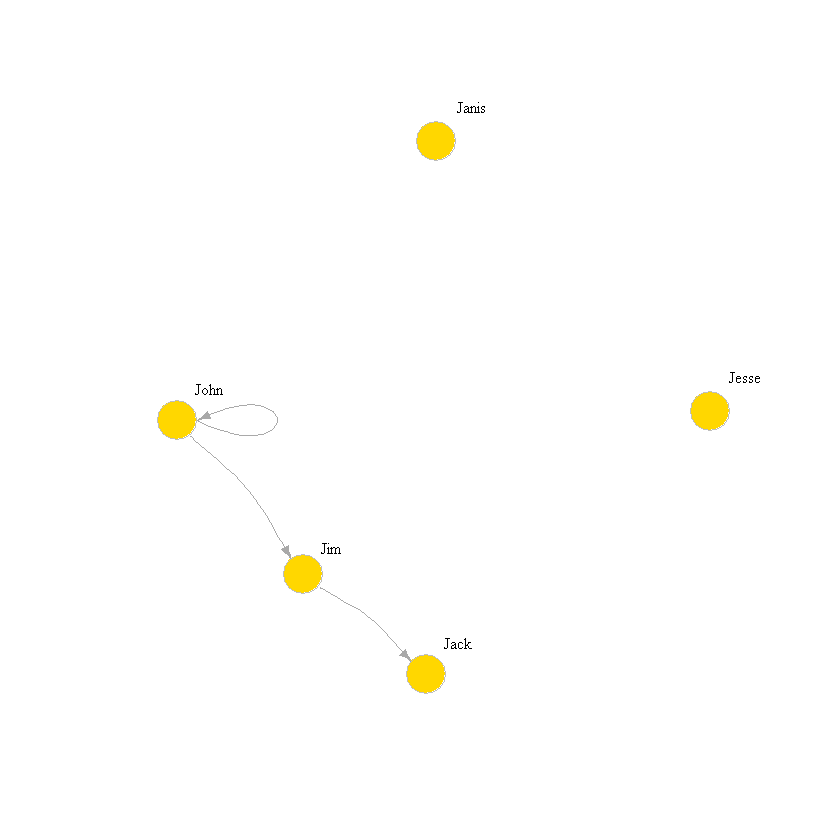

In [118]:
gJ <- graph( c("John", "Jim", "Jim", "Jack", "Jim", "Jack", "John", "John"), 

             isolates=c("Jesse", "Janis"))  

# In named graphs we can specify isolates by providing a list of their names.

plot(gJ, edge.arrow.size=.5, vertex.color="gold", vertex.size=15, 

     vertex.frame.color="gray", vertex.label.color="black", 

     vertex.label.cex=0.8, vertex.label.dist=1, edge.curved=0.2)

In [116]:
V(gJ)
E(gJ)

+ 5/5 vertices, named:
[1] John  Jim   Jack  Jesse Janis

+ 4/4 edges (vertex names):
[1] John->Jim  Jim ->Jack Jim ->Jack John->John

In [120]:
g <- erdos.renyi.game(1000, p, directed=F);
is.connected(g)

[1] TRUE

In [122]:
head(degreesVector, 20)

[1]  93 101 123  86 103 107  93 102 113 106 111 103 116  90  91  98 104 102 107
[20]  98

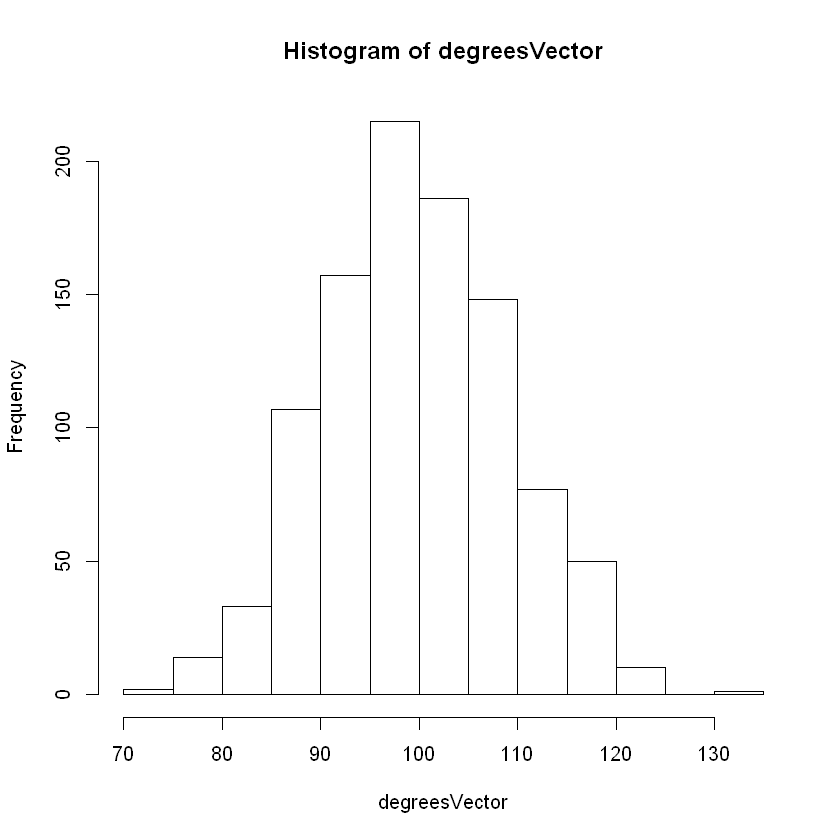

In [121]:
#get degree distribution

degreesVector <- degree(g)
hist(degreesVector)

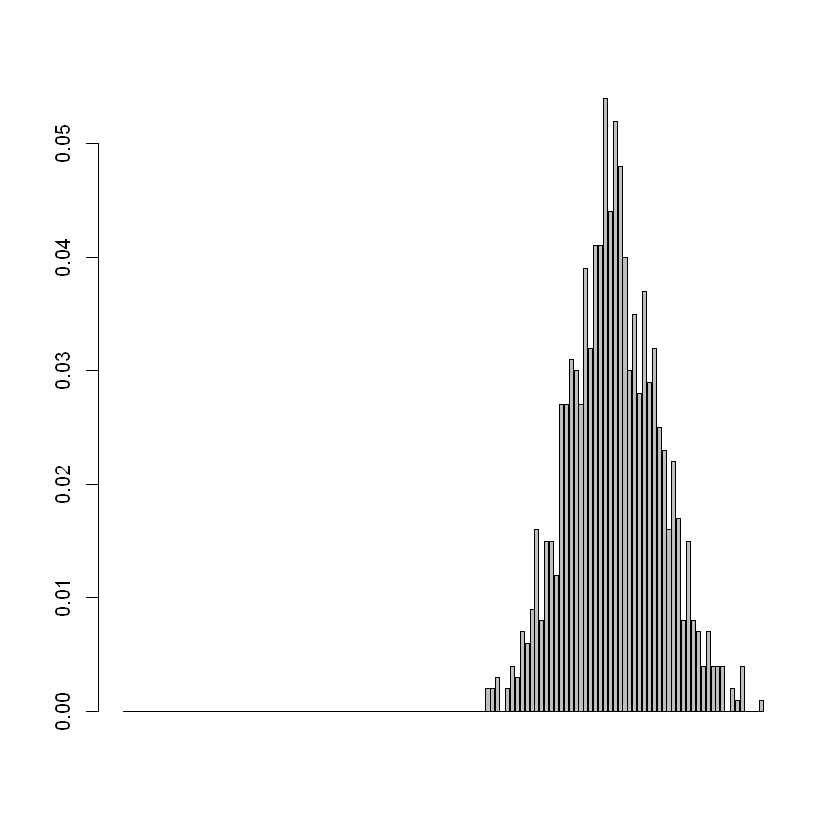

In [26]:
barplot(degree.distribution(g))

# Barabasi Networks
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2e/Barabasi_Albert_generated_network.jpg" alt="Arash">

In [123]:
# create barabasi graph
nodesNum = 100
g <- barabasi.game(nodesNum , directed = FALSE)

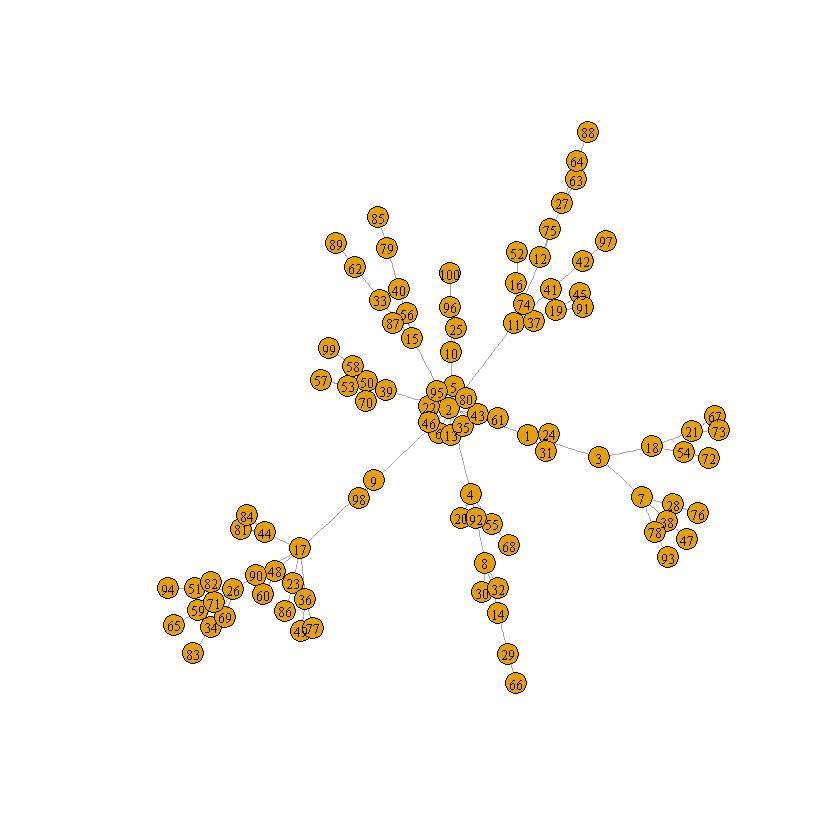

In [125]:
# plot(g, vertex.size=3, vertex.label=NA)
plot(g, vertex.size=8, vertex.label.cex=0.7)

In [126]:
# find communities
fg <- fastgreedy.community(g)
cmsize <- sizes(fg)

In [128]:
cmsize

Community sizes
 1  2  3  4  5  6  7  8  9 10 
15 14 11 11 11  9 10  6  7  6 

# Erdos Renyi Phase Transition Plot

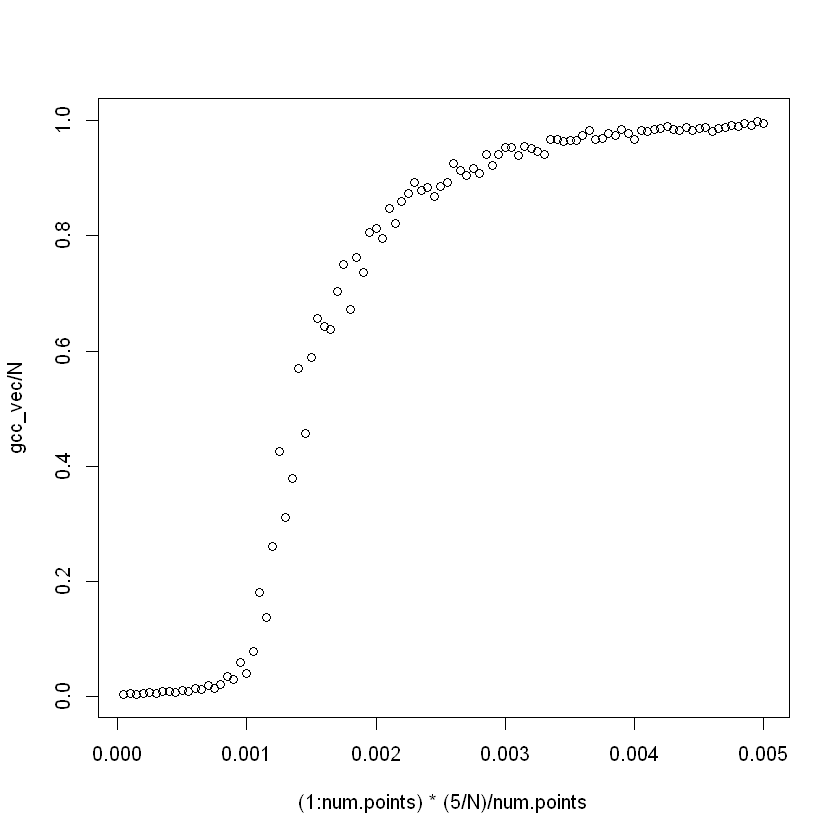

In [104]:
gcc_vec=c()
N=1000
num.points=100

for(i in 1:num.points){
  g <- erdos.renyi.game(1000, i*(5/N)/num.points, directed=F);
  cl <- clusters(g)
  # find the giant connected component
  gccIndex = which.max(cl$csize)
  nonGccNodes <- (1:vcount(g))[cl$membership != gccIndex]
  gcc <- delete.vertices(g, nonGccNodes)
  gcc_vec=c(gcc_vec, length(V(gcc)))
}
plot((1:num.points)*(5/N)/num.points, gcc_vec/N)